# Absentism Prediction Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
absent_df = pd.read_csv('D:\DATA SCIENCE - Udemy\part_8_case_study\S53_L379\Absenteeism-data.csv')
df = absent_df.copy()
absent_df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07-07-2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14-07-2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15-07-2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16-07-2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23-07-2015,289,36,33,239.554,30,1,2,1,2


## Data Preprocessing

In [3]:
# We can drop the ID column as it is only a unique identifier without much value to the analysis.
absent_df.drop(['ID'],axis=1,inplace=True)
absent_df.shape

(700, 11)

In [4]:
absent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
Reason for Absence           700 non-null int64
Date                         700 non-null object
Transportation Expense       700 non-null int64
Distance to Work             700 non-null int64
Age                          700 non-null int64
Daily Work Load Average      700 non-null float64
Body Mass Index              700 non-null int64
Education                    700 non-null int64
Children                     700 non-null int64
Pets                         700 non-null int64
Absenteeism Time in Hours    700 non-null int64
dtypes: float64(1), int64(9), object(1)
memory usage: 60.2+ KB


In [5]:
print(absent_df['Reason for Absence'].value_counts())
print(f"Total number of reasons : {len(list(absent_df['Reason for Absence'].value_counts()))}")

23    147
28    110
27     66
13     52
0      38
19     36
22     32
26     31
25     29
11     24
10     22
18     21
14     18
1      16
7      13
12      8
6       6
21      6
8       5
9       4
5       3
24      3
16      3
4       2
15      2
3       1
2       1
17      1
Name: Reason for Absence, dtype: int64
Total number of reasons : 28


##### We can merge some of the categories and reduce the number of categories in Reason for absence variable.

We can convert the feature "Reason for absence" from 28 categories to 4 categories.
- Class 1 to 14 is related to diseases and ilnesses.
- Class 15 to 17 is related to pregnancy and child birth.
- Class 18 to 21 is related to poisoning,injury etc.
- Class 22 to 28 is related to medical consultations and appointments


In [6]:
#The first 14 categories have very less values and can be combined.
absent_df['Reason for Absence'] = absent_df['Reason for Absence'].replace(to_replace = list(range(1,15)),value=1)

#The categories 15,16 and 17 will be combined into a single category.
absent_df['Reason for Absence'] = absent_df['Reason for Absence'].replace(to_replace = list(range(15,18)),value=2)

#The categories 18,19,20 and 21 will be combined into a single category.
absent_df['Reason for Absence'] = absent_df['Reason for Absence'].replace(to_replace = list(range(18,22)),value=3)

#The categories 22 to 28 will be combined into a single category.
absent_df['Reason for Absence'] = absent_df['Reason for Absence'].replace(to_replace = list(range(22,29)),value=4)

print(f"Total number of reasons : {len(list(absent_df['Reason for Absence'].value_counts()))}")

Total number of reasons : 5


In [7]:
absent_df['Reason for Absence'].value_counts()

4    418
1    175
3     63
0     38
2      6
Name: Reason for Absence, dtype: int64

In [8]:
#Let's dummy encode the feature 'Reason for Absence'

dummies = pd.get_dummies(absent_df['Reason for Absence'],drop_first=True,prefix='Reason',prefix_sep='_')

absent_df = pd.concat([absent_df,dummies],axis=1)

#Drop the original column 'Reason for Absence'
absent_df.drop(['Reason for Absence'],axis=1,inplace = True)

absent_df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,07-07-2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14-07-2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15-07-2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16-07-2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23-07-2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


#### Extract the day and month from the date column

In [9]:
#Convert int object to Datetime object.
absent_df['Date'] = pd.to_datetime(absent_df['Date'], format="%d-%m-%Y")

#Extract the Day of the week into a new feature.
absent_df['Day of the Week'] = absent_df['Date'].dt.dayofweek

#Extract month into a new feature.
absent_df['month'] = pd.DatetimeIndex(absent_df['Date']).month

#Drop the Date column.
absent_df.drop(['Date'],axis=1,inplace=True)

absent_df.head()

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4,Day of the Week,month
0,289,36,33,239.554,30,1,2,1,4,0,0,0,1,1,7
1,118,13,50,239.554,31,1,1,0,0,0,0,0,0,1,7
2,179,51,38,239.554,31,1,0,0,2,0,0,0,1,2,7
3,279,5,39,239.554,24,1,2,0,4,1,0,0,0,3,7
4,289,36,33,239.554,30,1,2,1,2,0,0,0,1,3,7


In [10]:
# Reorder the columns.
col_order = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4','month','Day of the Week', 'Transportation Expense', \
             'Distance to Work', 'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',\
             'Pets', 'Absenteeism Time in Hours']
absent_df = absent_df[col_order]
absent_df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,month,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,2


##### Turn the data from the ‘Education’ column into binary data

- 1 : Highschool
- 2 : Undergrad
- 3 : Postgrad
- 4 : Doctorate

By mapping the value of 0 to the values of 1, and the value of 1 to the rest of the values found in this column.

In [11]:
absent_df['Education'].value_counts()

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

Since the other 3 categories do not have a significant representation, we can combine them.

In [12]:
#Convert category 1 to 0
absent_df['Education'] = absent_df['Education'].replace(to_replace = [1], value = 0)

#Convert categories 2,3 and 4 to 1.
absent_df['Education'] = absent_df['Education'].replace(to_replace = [2,3,4], value = 1)

absent_df['Education'].value_counts()

0    583
1    117
Name: Education, dtype: int64

(array([ 41.,  49., 159., 118.,  22.,  74., 184.,  24.,   5.,   6.,  18.]),
 array([19.        , 20.72727273, 22.45454545, 24.18181818, 25.90909091,
        27.63636364, 29.36363636, 31.09090909, 32.81818182, 34.54545455,
        36.27272727, 38.        ]),
 <a list of 11 Patch objects>)

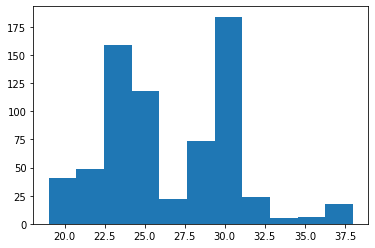

In [13]:
plt.hist(absent_df['Body Mass Index'],bins=11)

In [14]:
absent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 15 columns):
Reason_1                     700 non-null uint8
Reason_2                     700 non-null uint8
Reason_3                     700 non-null uint8
Reason_4                     700 non-null uint8
month                        700 non-null int64
Day of the Week              700 non-null int64
Transportation Expense       700 non-null int64
Distance to Work             700 non-null int64
Age                          700 non-null int64
Daily Work Load Average      700 non-null float64
Body Mass Index              700 non-null int64
Education                    700 non-null int64
Children                     700 non-null int64
Pets                         700 non-null int64
Absenteeism Time in Hours    700 non-null int64
dtypes: float64(1), int64(10), uint8(4)
memory usage: 63.0 KB


The remaining features are continuous variables without any missing values.

## Checkpoint

In [15]:
df_preprocessed = absent_df.copy()
df_preprocessed.to_csv('Absenteeism_preprocessed.csv', index=False)

In [16]:
df_preprocessed.head()

,Reason_1,Reason_2,Reason_3,Reason_4,month,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2
